This file analyzes the results for the LAS model for CS 229

In [75]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import os

py.offline.init_notebook_mode(connected=True)

In [76]:
# load results (will be added to)
root = os.getcwd()
trans_DF = pd.read_csv(root + '/nab/Data/trans_DF.csv').iloc[:,1:]
test_DF = trans_DF[trans_DF.test == 1].reset_index(drop = True).drop('fileloc', axis = 1)
test_DF['phonemes'] = test_DF.phonemes.apply(lambda x: x.split())

numtrain=trans_DF[trans_DF.train == 1].shape[0]
numdev=trans_DF[trans_DF.dev == 1].shape[0]
numtest=trans_DF[trans_DF.test == 1].shape[0]
numall = numtrain + numdev + numtest

print('Train-Dev-Test Split: ', str(numtrain/numall), '-', str(numdev/numall), '-', str(numtest/numall), sep='')

print(test_DF.shape) # true labels

Train-Dev-Test Split: 0.8387521725172418-0.07223273886619508-0.08901508861656315
(8041, 12)


In [77]:
test_DF[0:8]

,label,P1,P2,P3,P4,control,gender,word,train,dev,test,phonemes
0,CM13_B1_C1_M3,CM13,B1,C1,M3,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]"
1,CM13_B1_C1_M5,CM13,B1,C1,M5,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]"
2,CM13_B1_C1_M6,CM13,B1,C1,M6,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]"
3,CM13_B1_C1_M7,CM13,B1,C1,M7,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]"
4,CM13_B1_C1_M8,CM13,B1,C1,M8,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]"
5,CM13_B1_C10_M3,CM13,B1,C10,M3,1,M,line,0,0,1,"[l, ay1, n]"
6,CM13_B1_C10_M5,CM13,B1,C10,M5,1,M,line,0,0,1,"[l, ay1, n]"
7,CM13_B1_C10_M6,CM13,B1,C10,M6,1,M,line,0,0,1,"[l, ay1, n]"


# Google

In [78]:
goog_results = pd.read_csv(root + '/nab/Results/goog_results.csv', ).iloc[:,1:]
goog_results[0:5]

,label,transcript
0,M14_B3_CW72_M8,go
1,CM13_B2_UW98_M3,ring
2,F04_B1_UW85_M5,telephone
3,M16_B3_CW42_M8,NaN
4,M14_B1_UW71_M5,gigantic


In [79]:
# merge with google
goog_results = test_DF.merge(goog_results, how = 'inner', on = 'label')

# convert nubmers to spelling
nums = {'0': 'zero', '1': 'one', '2': 'two', '3': 'three', '4': 'four', '5': 'five', '6': 'six', '7': 'seven', '8': 'eight', '9': 'nine'}
for num,spell in nums.items():
    goog_results.loc[goog_results.transcript == num, 'transcript'] = spell

In [80]:
goog_results = goog_results.assign(correct = np.where(goog_results.word == goog_results.transcript, 1, 0))

In [81]:
print('Google accuracy on speakers with dyarthria: ', goog_results[goog_results.control == 1].correct.mean() * 100, '%', sep = '')
print('Google accuracy on speakers without dyarthria: ', goog_results[goog_results.control == 0].correct.mean() * 100, '%', sep = '')

Google accuracy on speakers with dyarthria: 85.84699453551913%
Google accuracy on speakers without dyarthria: 49.052727687742525%


# LAS_04

Manipulate test DF / get transcriptions of phonemes from models

In [82]:
files = os.listdir(results_dir + '/LAS_04/decoded')
labels = [files[2*i] for i in range(int(len(files)/2))]

In [83]:
phonemes = []
for lab in labels:
    f = open(results_dir + '/LAS_04/decoded/' + lab)
    phoneme = f.read().split('\n')[0].split()[1:]
    phonemes.append(phoneme)

In [84]:
las_DF = pd.DataFrame(dict(label = labels, phonemes_pred = phonemes))

In [85]:
las_DF = test_DF.merge(las_DF, on = 'label', how = 'inner')
las_DF[0:10]

,label,P1,P2,P3,P4,control,gender,word,train,dev,test,phonemes,phonemes_pred
0,CM13_B1_C1_M3,CM13,B1,C1,M3,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]","[k, ah0, m, ae1, n, d]"
1,CM13_B1_C1_M5,CM13,B1,C1,M5,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]","[k, ah0, m, ae1, n, d]"
2,CM13_B1_C1_M6,CM13,B1,C1,M6,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]","[g, r, ey1, hh, aw2, n, d]"
3,CM13_B1_C1_M7,CM13,B1,C1,M7,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]","[k, ae1, n, d, ah0, l, l, ay2, t]"
4,CM13_B1_C1_M8,CM13,B1,C1,M8,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]","[g, r, ey1, hh, aw2, n, d]"
5,CM13_B1_C10_M3,CM13,B1,C10,M3,1,M,line,0,0,1,"[l, ay1, n]","[w, ey1]"
6,CM13_B1_C10_M5,CM13,B1,C10,M5,1,M,line,0,0,1,"[l, ay1, n]","[l, ay1, n]"
7,CM13_B1_C10_M6,CM13,B1,C10,M6,1,M,line,0,0,1,"[l, ay1, n]","[l, ay1, n]"
8,CM13_B1_C10_M7,CM13,B1,C10,M7,1,M,line,0,0,1,"[l, ay1, n]","[w, ey1]"
9,CM13_B1_C10_M8,CM13,B1,C10,M8,1,M,line,0,0,1,"[l, ay1, n]","[w, ey1]"


Break down results by phoneme

In [86]:
f = open('nab/Data/alphabet.txt', 'r')
alph = f.read()
alph = alph.split()
alph.sort()

In [87]:
def rank_phonemes(alphabet, phonlistreal, phonlistpred):
    phondict = {phon:dict(bad = 0, total = 0, PER = 0) for phon in alph}
    for i in range(len(phonlistreal)):
        for phon in phonlistreal[i]:
            if phon not in phonlistpred[i]:
                phondict[phon]['bad'] += 1
            phondict[phon]['total'] += 1
    for phon, vals in phondict.items():
        phondict[phon]['PER'] = phondict[phon]['bad']*100/phondict[phon]['total']
    phon_DF = pd.DataFrame(data=dict(phoneme=list(phondict.keys()), 
                                     bad = [phondict[key]['bad'] for key,value in phondict.items()],
                                     total = [phondict[key]['total'] for key,value in phondict.items()],
                                     PER = [phondict[key]['PER'] for key,value in phondict.items()],
                                    ))
    lastrow = pd.DataFrame(columns=list(phon_DF.columns))
    lastrow.loc[0, 'bad'] = phon_DF['bad'].sum()
    lastrow.loc[0, 'total'] = phon_DF['total'].sum()
    lastrow['PER'] = lastrow.loc[0,'bad']*100/lastrow.loc[0,'total']
    lastrow['phoneme'] = 'all'
    phon_DF = phon_DF.append(lastrow).reset_index(drop=True)
    return phon_DF

In [88]:
top_30=list(rank_phonemes(alph, list(las_DF['phonemes']), list(las_DF['phonemes_pred'])).sort_values('total', ascending=False).phoneme[0:31])
top_30.sort()
top_30.append(top_30.pop(top_30.index('all')))
print(top_30)

['aa1', 'ae1', 'ah0', 'ah1', 'ay1', 'b', 'd', 'dh', 'eh1', 'er0', 'ey1', 'f', 'g', 'hh', 'ih0', 'ih1', 'iy0', 'iy1', 'k', 'l', 'm', 'n', 'p', 'r', 's', 't', 'uw1', 'v', 'w', 'z', 'all']


In [89]:
peopleset = set(las_DF['P1'])
PER_DF = pd.DataFrame()
for person in peopleset:
    df = rank_phonemes(alph, list(las_DF.loc[las_DF.P1 == person, 'phonemes']), list(las_DF.loc[las_DF.P1 == person, 'phonemes_pred']))
    df['P1'] = person
    df = df.drop(labels=['bad', 'total'], axis=1).pivot(index='P1', columns='phoneme', values='PER')
    df = df[top_30]
    PER_DF = PER_DF.append(df)

In [90]:
PER_DF

phoneme,aa1,ae1,ah0,ah1,ay1,b,d,dh,eh1,er0,...,n,p,r,s,t,uw1,v,w,z,all
P1,,,,,,,,,,,,,,,,,,,,,
CM13,46.206897,55.897436,38.165138,46.785714,42.962963,42.061856,46.942149,48.571429,45.000000,56.410256,...,38.901099,63.243243,42.481752,33.170732,31.250000,54.117647,68.695652,33.500000,48.484848,48.587642
M14,66.141732,45.033113,50.432900,64.957265,48.672566,54.871795,58.620690,53.763441,69.565217,69.655172,...,60.994764,70.921986,53.947368,28.048780,47.894737,54.901961,80.487805,43.827160,41.958042,58.694297
F04,73.333333,76.978417,44.103774,69.000000,61.904762,69.101124,67.948718,60.194175,78.125000,75.000000,...,67.213115,62.500000,54.961832,67.932489,60.115607,76.190476,91.358025,48.170732,86.206897,69.025825
M16,65.853659,70.779221,39.805825,65.573770,61.386139,58.659218,58.898305,76.595745,71.856287,75.912409,...,57.526882,68.874172,61.409396,58.333333,44.204852,54.782609,85.897436,41.717791,68.939394,63.126284


Create heatmap of common phonemes

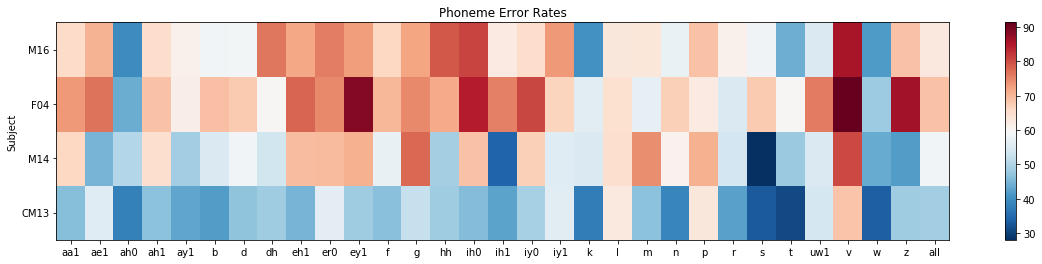

In [91]:
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,4))

c = ax.pcolormesh(PER_DF, cmap='RdBu_r')
ax.set_title('Phoneme Error Rates')
fig.colorbar(c, ax=ax)

plt.ylabel('Subject')
plt.yticks(np.linspace(0.5, 3.5, 4), peopleset)
plt.xticks(np.linspace(0.5, 30.5, 31), top_30)
plt.show()

Find top 5 best and worst phonemes for control, dysarthric, and difference

In [92]:
las_d_DF = las_DF[las_DF['control'] == 0]
las_c_DF = las_DF[las_DF['control'] != 0]

In [93]:
phon_c_DF = rank_phonemes(alph, list(las_c_DF['phonemes']), list(las_c_DF['phonemes_pred'])).sort_values('PER')
phon_c_DF = phon_c_DF[phon_c_DF['phoneme'].apply(lambda x: x in top_30)]

In [94]:
phon_c_DF_best = phon_c_DF[0:5]
phon_c_DF_best

,phoneme,bad,total,PER
52,t,275,880,31.250000
50,s,204,615,33.170732
60,w,134,400,33.500000
38,k,221,590,37.457627
6,ah0,416,1090,38.165138


In [95]:
phon_c_DF_worst = phon_c_DF[-5:]
phon_c_DF_worst

,phoneme,bad,total,PER
35,iy1,129,230,56.086957
22,er0,220,390,56.410256
39,l,536,855,62.690058
48,p,234,370,63.243243
59,v,158,230,68.695652


In [96]:
phon_d_DF = rank_phonemes(alph, list(las_d_DF['phonemes']), list(las_d_DF['phonemes_pred'])).sort_values('PER')
phon_d_DF = phon_d_DF[phon_d_DF['phoneme'].apply(lambda x: x in top_30)]

In [97]:
phon_d_DF_best = phon_d_DF[0:5]
phon_d_DF_best

,phoneme,bad,total,PER
60,w,218,489,44.580777
6,ah0,584,1298,44.992296
38,k,353,701,50.356633
52,t,554,1097,50.501367
50,s,377,735,51.292517


In [98]:
phon_d_DF_worst = phon_d_DF[-5:]
phon_d_DF_worst

,phoneme,bad,total,PER
22,er0,319,434,73.502304
29,g,188,251,74.900398
26,ey1,231,298,77.516779
31,ih0,230,295,77.966102
59,v,207,241,85.892116


In [99]:
phon_diff_DF = pd.DataFrame(data = dict(phoneme=phon_d_DF['phoneme'], PER_pct=phon_d_DF['PER']-phon_c_DF['PER'])).sort_values('PER_pct')

In [100]:
phon_diff_DF_best = phon_diff_DF[0:5]
phon_diff_DF_best

,phoneme,PER_pct
39,l,1.718435
48,p,4.280121
6,ah0,6.827158
57,uw1,7.683595
4,ae1,8.066528


In [101]:
phon_diff_DF_worst = phon_diff_DF[-5:]
phon_diff_DF_worst

,phoneme,PER_pct
29,g,22.455954
41,n,22.973901
20,eh1,28.155738
26,ey1,28.945350
31,ih0,31.966102


find WER

In [104]:
bad = 0
phon_d = list(las_d_DF.phonemes)
phon_d_pred = list(las_d_DF.phonemes_pred)
for i in range(len(las_d_DF)):
    if phon_d[i] != phon_d_pred[i]:
        bad += 1
las_WER = bad/len(las_d_DF)
las_WER

0.8014152020086738